 ALGORITMO GENETICO TRADICIONAL PARA 
LA SOLUCION DEL PROBLEMA DE LAS CIUDADES   

In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [435]:
data = pd.read_excel('Ciudades.xlsx')
data.describe()

,x,y
count,20.000000,20.000000
mean,49.850000,50.950000
std,30.267709,27.496363
min,10.000000,12.000000
25%,26.500000,31.500000
50%,50.000000,54.000000
75%,77.750000,66.250000
max,99.000000,99.000000


In [436]:
data.head(5)

,Ciudad,x,y
0,A,10.0,12.0
1,B,12.0,16.0
2,C,22.0,22.0
3,D,30.0,30.0
4,E,NaN,NaN


In [437]:
data = data.dropna(axis=0, how='any', ignore_index=True)
data.head(100)


,Ciudad,x,y
0,A,10.0,12.0
1,B,12.0,16.0
2,C,22.0,22.0
3,D,30.0,30.0
4,M,12.0,32.0
5,N,16.0,42.0
6,O,28.0,56.0
7,P,28.0,12.0
8,Q,62.0,55.0
9,R,95.0,32.0


In [438]:
#data.count()
test =  data.loc[data['Ciudad'] == 'A']
print(test.iloc[0]['x'])
print(test.iloc[0]['y'])



10.0
12.0


In [439]:
lbls = data.iloc[:,0].values
x = data.iloc[:, 1]
y = data.iloc[:, 2]
print(lbls)
print(x)
print(y)


['A' 'B' 'C' 'D' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'AA' 'AB']
0     10.0
1     12.0
2     22.0
3     30.0
4     12.0
5     16.0
6     28.0
7     28.0
8     62.0
9     95.0
10    84.0
11    64.0
12    31.0
13    55.0
14    45.0
15    57.0
16    90.0
17    77.0
18    99.0
19    80.0
Name: x, dtype: float64
0     12.0
1     16.0
2     22.0
3     30.0
4     32.0
5     42.0
6     56.0
7     12.0
8     55.0
9     32.0
10    53.0
11    36.0
12    62.0
13    70.0
14    55.0
15    91.0
16    99.0
17    65.0
18    99.0
19    80.0
Name: y, dtype: float64


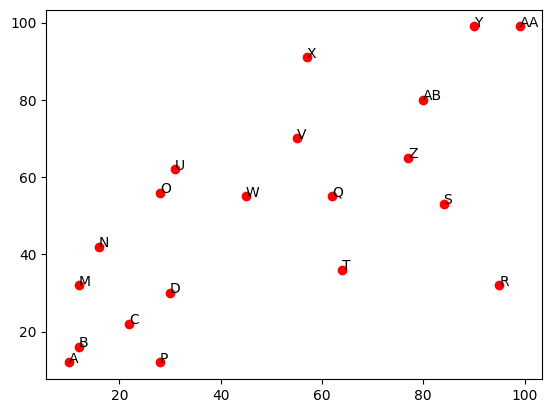

In [440]:
fig, ax = plt.subplots()
ax.plot(x,y,'ro')
for i, text in enumerate(lbls):
    ax.text(x[i],y[i],text)
plt.show()

# Se inicia con el desarrollo del algoritmo genetico

#### Generar poblacion aleatoria

In [441]:
def generarPoblacionAleatoria(tam_poblacion,labels):
    poblacion = []
    num_ciudades = len(lbls)
    for i in range(tam_poblacion):
        individuo = []
        while(len(individuo) <num_ciudades):
        #for j in range(num_ciudades):
            label = random.choice(labels)
            if label not in individuo:
                individuo.append(label) 
        poblacion.append(individuo)
    return poblacion

### Evaluar la poblacion

In [442]:
def fitness(poblacion,x,y,data):
    distancias = []
    
    for individuo in poblacion:
        distancia = 0
        #print("individo")
        #print(individuo)
        for i in range(len(individuo)-1):
            ind1 = data.loc[data['Ciudad'] == individuo[i]]
            ind2 = data.loc[data['Ciudad'] == individuo[i+1]]
            xind1 = ind1.iloc[0]['x']
            yind1 = ind1.iloc[0]['y']
            xind2 = ind2.iloc[0]['x']
            yind2 = ind2.iloc[0]['y']
            
            dist = math.sqrt((xind2-xind1)**2+(yind2-yind1)**2)
            #print(dist)
            distancia +=dist
        distancias.append(distancia)
            
            
    return distancias
        

In [443]:
def selection(poblacion,distancias):
    combinados = list(zip(distancias, poblacion))
    combinados_ordenados = sorted(combinados)
    dist, pob = zip(*combinados_ordenados)
    
    return pob[0:int(len(poblacion)/2)],dist[0:int(len(poblacion)/2)]
    

In [444]:
def quitarDuplicados(hijo,lbls):
    #FUNCION PARA QUITAR LAS LETRAS DUPLICADAS Y COLOCAR LAS FALTANTES
    letras_usadas = set(hijo)
    letras_faltantes = []
    for letra in lbls:
        if letra not in letras_usadas:
            letras_faltantes.append(letra)
    res = []
    for letra in hijo:
        if letra in letras_usadas:
            res.append(letra)
            letras_usadas.remove(letra)
        else:
            res.append(None)
    #la lista tiene posiciones vacias donde hay repetidos
    id = 0
    for i in range(len(res)):
        if res[i] is None:
            res[i] = letras_faltantes[id]
            id +=1
    return res
        
            

In [445]:
def cruza_mutacion(progenitores,prob_cruza,prob_muta,lbls):
    hijos_nuevos = []
    for i in range(0,len(progenitores)-1,2):
        
        #seleccion de los padres
        padre1 = progenitores[i]
        padre2 = progenitores[i+1]
        
        if random.random() > prob_cruza:
            #seleccion punto de cruza
            punto1 = random.randint(1, len(padre1)-2)
            punto2 = random.randint(punto1+1, len(padre1)-1)    
            
            #creacion de hijos
            hijo1 = padre1[:punto1] + padre2[punto1:punto2] + padre1[punto2:] 
            hijo2 = padre2[:punto1] + padre1[punto1:punto2] + padre2[punto2:]
            
            #quitar repetidos y colocar los faltantes
            hijo1 = quitarDuplicados(hijo1,lbls)
            hijo2 = quitarDuplicados(hijo2,lbls)
            
            
        else: 
            hijo1 = padre1
            hijo2 = padre2
        
        if random.random() > prob_muta:
            print("Generando muta")
            punto_muta1 = random.randint(0,len(hijo1)-1)
            punto_muta2 = random.randint(0,len(hijo2)-1)
            aux1 = hijo1[punto_muta1]
            hijo1[punto_muta1] = hijo1[punto_muta2]
            hijo1[punto_muta2] = aux1
            aux2 = hijo2[punto_muta1]
            hijo2[punto_muta1] = hijo2[punto_muta2]
            hijo2[punto_muta2] = aux2
            
        #AGREGO NUEVOS HIJOS A LA LISTA    
        hijos_nuevos.append(hijo1)
        hijos_nuevos.append(hijo2)
    
    return hijos_nuevos
        
        
        

# funcion principal


In [446]:
#generar poblacion aleatoria
tam_poblacion = 20
probabilidad_cruza = 0.5
probabilidad_muta = 0.0
generaciones = 100


poblacion = generarPoblacionAleatoria(20,lbls)
#evaluacion de la poblacion
distancias = fitness(poblacion,x,y,data)
#seleccion
seleccionados,distancias_seleccionados = selection(poblacion,distancias)
#print(len(seleccionados))
#cruza y mutacion
nuevos_hijos = cruza_mutacion(seleccionados,probabilidad_cruza,probabilidad_muta,lbls)

#unir poblacion final
poblacion = list(seleccionados)+nuevos_hijos
print(distancias[0])



Generando muta
Generando muta
Generando muta
Generando muta
Generando muta
993.9967943900557


In [447]:
punto1 = random.randint(1, len(seleccionados[0])-2)
punto2 = random.randint(punto1+1, len(seleccionados[0])-1)
print(punto1,punto2,len(seleccionados[0]))

1 8 20


In [448]:
#generar poblacion aleatoria
tam_poblacion = 20
probabilidad_cruza = 0.45
probabilidad_muta = 0.05
generaciones = 200


poblacion = generarPoblacionAleatoria(20,lbls)
num_generaciones = 0

mejor_individuo = []
mejor_distancia = 0
hist_individuos = []
hist_distancias = []
while(num_generaciones < generaciones):
    
    #evaluacion de la poblacion
    distancias = fitness(poblacion,x,y,data)
    #seleccion
    seleccionados,distancias_seleccionados = selection(poblacion,distancias)
    #print(len(seleccionados))
    #cruza y mutacion
    nuevos_hijos = cruza_mutacion(seleccionados,probabilidad_cruza,probabilidad_muta, lbls)
    
    #unir poblacion final
    poblacion = list(seleccionados)+nuevos_hijos
    
    distancias = fitness(poblacion,x,y,data)
    seleccionados,distancias_seleccionados = selection(poblacion,distancias)
    mejor_individuo = seleccionados[0]
    mejor_distancia = distancias_seleccionados[0]
    
    hist_individuos.append(mejor_individuo)
    hist_distancias.append(mejor_distancia)
    
    print("GENERACION ---{} MEJOR DISTANCIA----{} MEJOR_INDIVIDUO---{}".format(num_generaciones,mejor_distancia,mejor_individuo))
    num_generaciones += 1
    
    


Generando muta
Generando muta
Generando muta
Generando muta
GENERACION ---0 MEJOR DISTANCIA----802.8232297804046 MEJOR_INDIVIDUO---['T', 'Q', 'C', 'M', 'AB', 'U', 'O', 'N', 'P', 'W', 'B', 'A', 'Z', 'R', 'S', 'X', 'Y', 'V', 'AA', 'D']
Generando muta
Generando muta
Generando muta
Generando muta
Generando muta
GENERACION ---1 MEJOR DISTANCIA----805.3917369392915 MEJOR_INDIVIDUO---['T', 'Q', 'C', 'M', 'AB', 'U', 'O', 'N', 'P', 'W', 'B', 'A', 'Z', 'R', 'V', 'X', 'Y', 'S', 'AA', 'D']
Generando muta
Generando muta
Generando muta
Generando muta
Generando muta
GENERACION ---2 MEJOR DISTANCIA----770.2655086653173 MEJOR_INDIVIDUO---['T', 'Q', 'C', 'M', 'AB', 'U', 'O', 'N', 'W', 'P', 'B', 'A', 'Z', 'R', 'V', 'X', 'Y', 'S', 'AA', 'D']
Generando muta
Generando muta
Generando muta
Generando muta
Generando muta
GENERACION ---3 MEJOR DISTANCIA----741.5815211583609 MEJOR_INDIVIDUO---['T', 'Q', 'C', 'W', 'AB', 'U', 'O', 'N', 'P', 'M', 'B', 'A', 'Z', 'R', 'Y', 'S', 'V', 'X', 'AA', 'D']
Generando muta
Gene

In [449]:
print(mejor_distancia)
print(mejor_individuo)
#obtener x y de cada individuo 
x = []
y = []
for gen in mejor_individuo:
    x.append(data[data['Ciudad'] == gen].iloc[0]['x'])
    y.append(data[data['Ciudad'] == gen].iloc[0]['y'])
#print(y)
    


588.8489356926193
['Y', 'S', 'V', 'R', 'Z', 'T', 'W', 'M', 'P', 'C', 'A', 'N', 'B', 'D', 'U', 'O', 'X', 'AA', 'AB', 'Q']


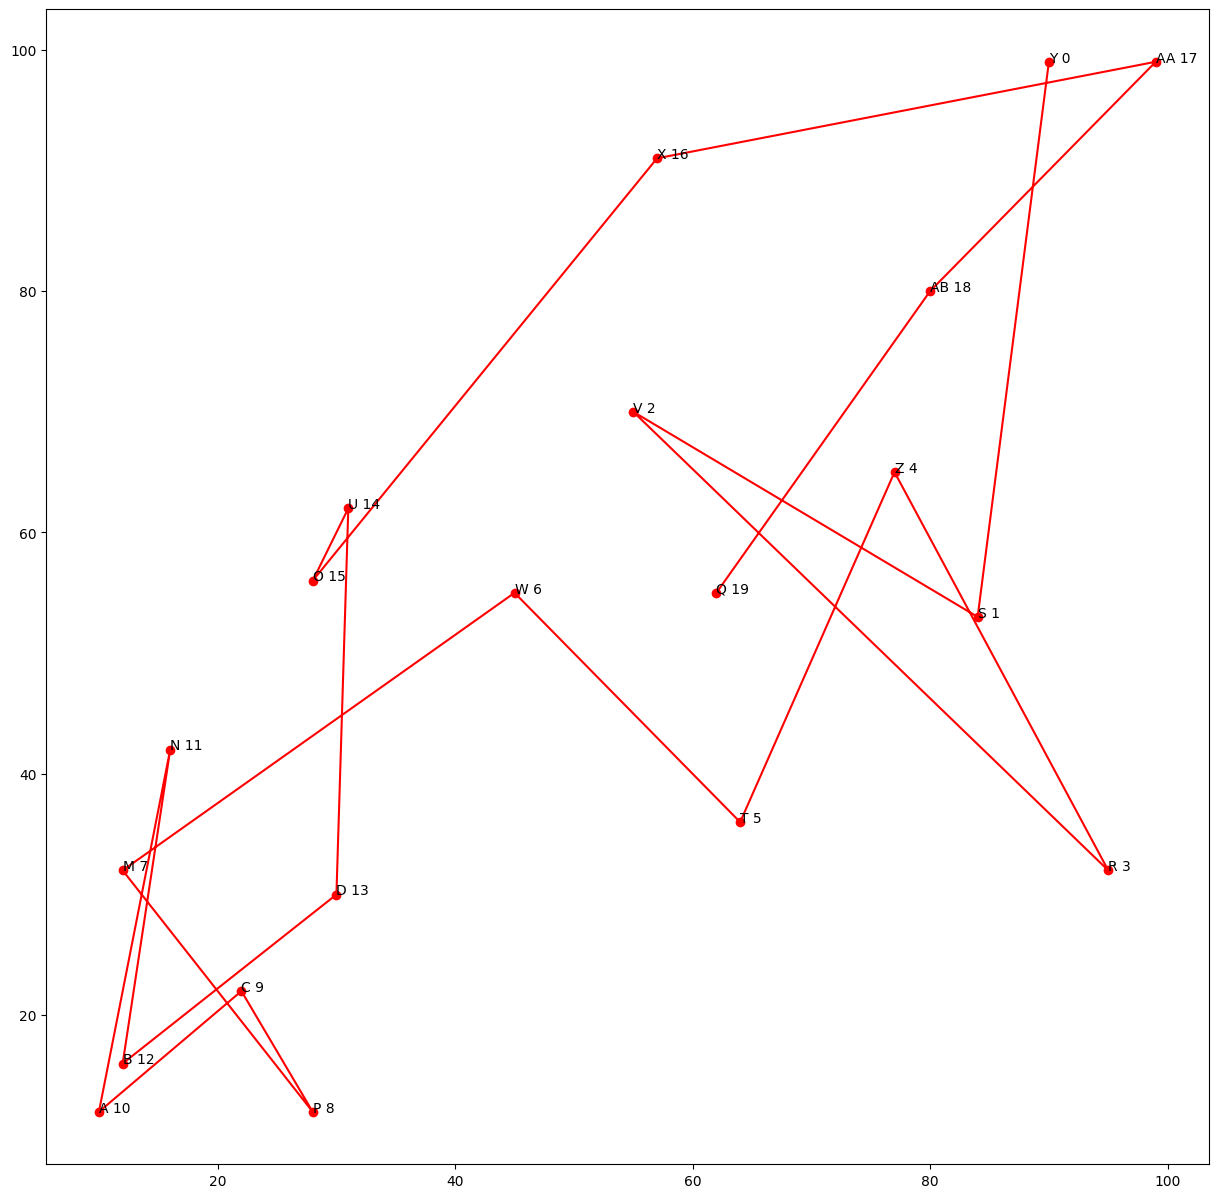

In [450]:
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(x,y,'-ro')
cont = 0
for i, text in enumerate(mejor_individuo):
    txt = text+" "+str(cont)
    ax.text(x[i],y[i],txt)
    cont +=1
plt.show()

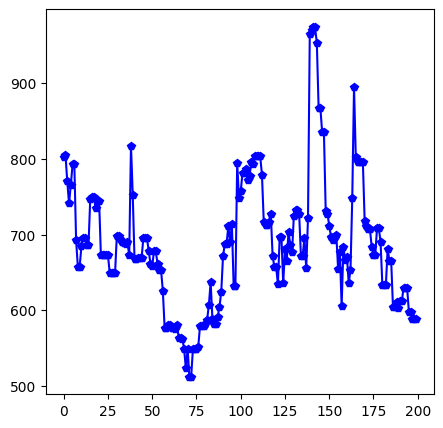

In [461]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(hist_distancias,'-bp')
plt.show()